<a id ='2' ></a>
<h1 style = "color:black;border:0;font-family:Segoe Print;font-weight:bold">Loan Prediction System 📚</h1> 


<h3 style = "color:black;border:0;font-family:Segoe Print;font-weight:bold">Outline 📚</h3>  

 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Loading and Exploring the data</p>  
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Data Preprocessing</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Feature Engineering</p>
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Dropping Unecessary columns</p>  
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Data Visualization</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Encoding the Categorical data</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Splitting Data</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Model Building</p> 
     -<p style = "color:black;font-family:Segoe Print;font-weight:bold">Decision Tree Classifier</p>

     -<p style = "color:black;font-family:Segoe Print;font-weight:bold">Random Forest Classifier</p>
     <span></span>
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Model Training</p> 
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Model Evaluation</p> 
   <span></span>
   <span><b>For Local Machine</b></span>  
 - <p style = "color:black;font-family:Segoe Print;font-weight:bold">Generate .csv file as output</p>  
   

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## Data Loading

In [84]:
df=pd.read_csv('data.csv')
ef=pd.read_csv('loan-test.csv')

## Exploring & Understanding the Data

In [85]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [86]:
loan_id=df['Loan_ID']
df=df.drop('Loan_ID',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [87]:
df.shape

(614, 12)

In [88]:
#df.describe()

In [89]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [90]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Exploratory Data Analysis
### Data Visualization

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

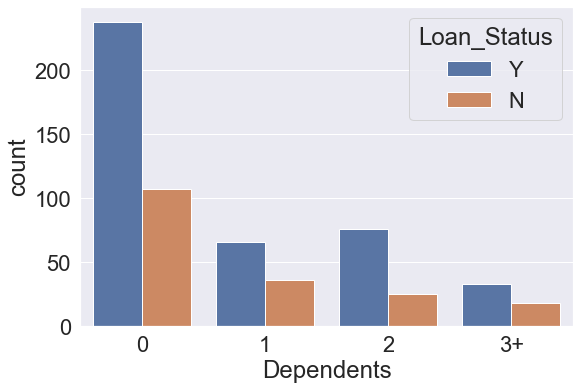

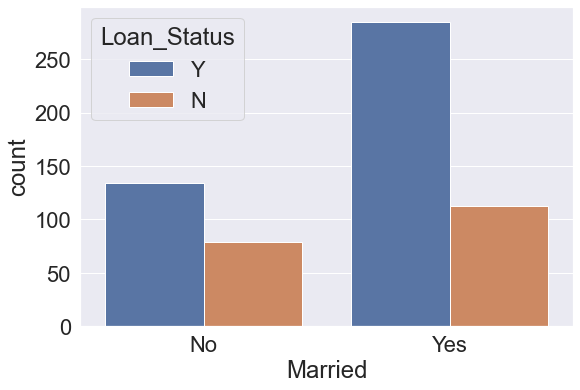

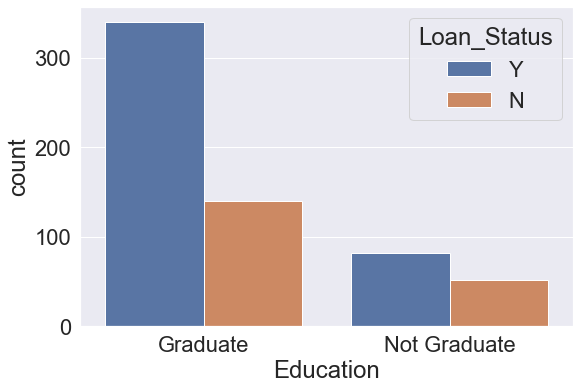

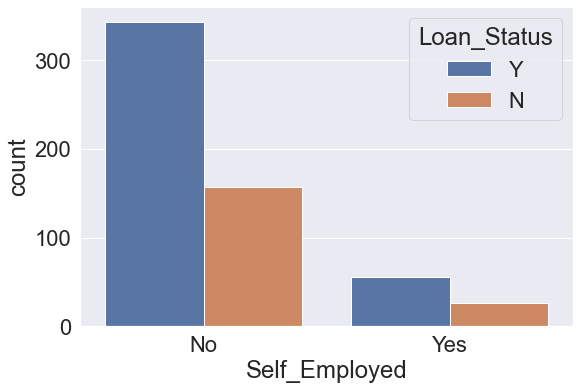

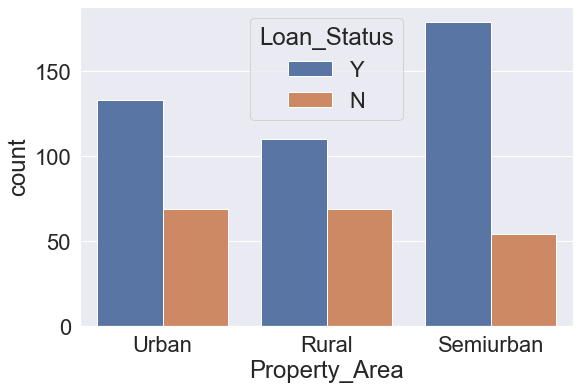

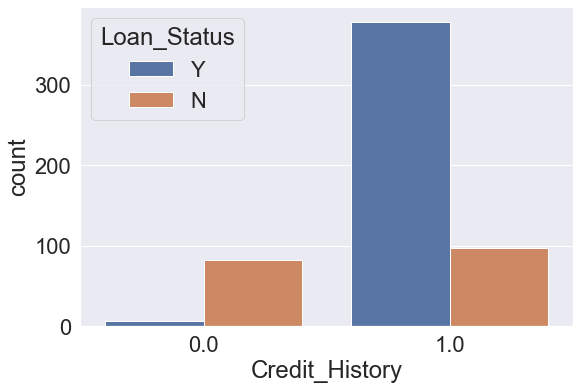

In [91]:
# For catagorical features

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(331)
sns.countplot(df['Dependents'],hue=df['Loan_Status'])


plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(333)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(334)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(335)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(336)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

plt.figure(figsize = (30, 20))
sns.set(font_scale = 2)
plt.subplot(337)
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])


In [92]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

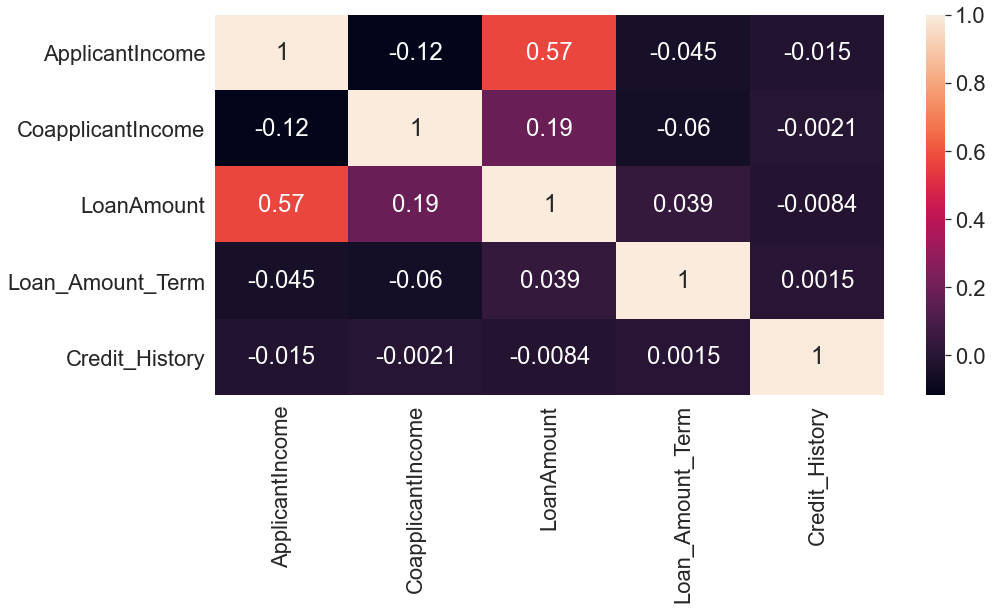

In [93]:
corr= df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

(array([ 17., 224., 182.,  81.,  29.,  25.,  15.,   7.,   5.,   7.,   6.,
          3.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <BarContainer object of 50 artists>)

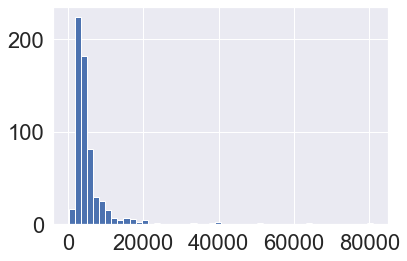

In [94]:
plt.hist(df.ApplicantIncome, bins=50)



(array([561.,  46.,   3.,   0.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([    0. ,  4166.7,  8333.4, 12500.1, 16666.8, 20833.5, 25000.2,
        29166.9, 33333.6, 37500.3, 41667. ]),
 <BarContainer object of 10 artists>)

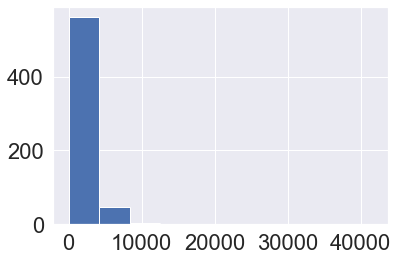

In [95]:
plt.hist(df.CoapplicantIncome, bins=10)

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

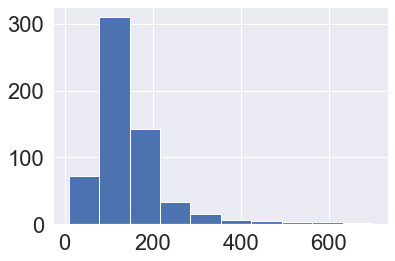

In [96]:
plt.hist(df.LoanAmount, bins=10)

(array([  9.,  47.,   4., 525.,  15.]),
 array([ 12. , 105.6, 199.2, 292.8, 386.4, 480. ]),
 <BarContainer object of 5 artists>)

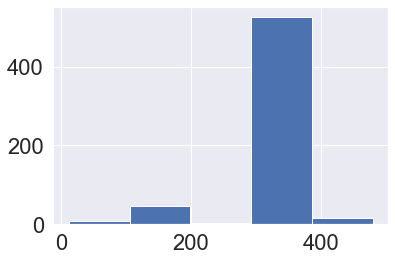

In [97]:
plt.hist(df.Loan_Amount_Term, bins=5)

In [98]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Preprocessing

## Checking for Missing Value and Imputation

In [99]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [101]:
cols= df[["Gender","Married","Dependents","Self_Employed"]]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

In [102]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Engineering

In [103]:
df['Total_Income']= df['ApplicantIncome']+df['CoapplicantIncome']
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [104]:
df['EMI']= df['LoanAmount']/df['Loan_Amount_Term']
Status=df['Loan_Status']

In [105]:
Status=df['Loan_Status']
df= df.drop('Loan_Status',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,5849.0,0.406700
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0,0.355556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0,0.183333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0,0.333333
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,2900.0,0.197222
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,4106.0,0.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,8312.0,0.702778
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,7583.0,0.519444


In [106]:
df = pd.concat([df, Status], axis=1, join='outer')
df= df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,5849.0,0.406700,Y
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,6091.0,0.355556,N
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,3000.0,0.183333,Y
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,4941.0,0.333333,Y
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,6000.0,0.391667,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,1.0,Rural,2900.0,0.197222,Y
610,Male,Yes,3+,Graduate,No,40.000000,180.0,1.0,Rural,4106.0,0.222222,Y
611,Male,Yes,1,Graduate,No,253.000000,360.0,1.0,Urban,8312.0,0.702778,Y
612,Male,Yes,2,Graduate,No,187.000000,360.0,1.0,Urban,7583.0,0.519444,Y


## Checking for Outliers

In [107]:
df.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,EMI
LoanAmount,1.000000,0.036475,-0.001431,0.620102,0.491278
Loan_Amount_Term,0.036475,1.000000,-0.004705,-0.070917,-0.501385
Credit_History,-0.001431,-0.004705,1.000000,-0.012563,0.015001
Total_Income,0.620102,-0.070917,-0.012563,1.000000,0.364644
EMI,0.491278,-0.501385,0.015001,0.364644,1.000000


<AxesSubplot:>

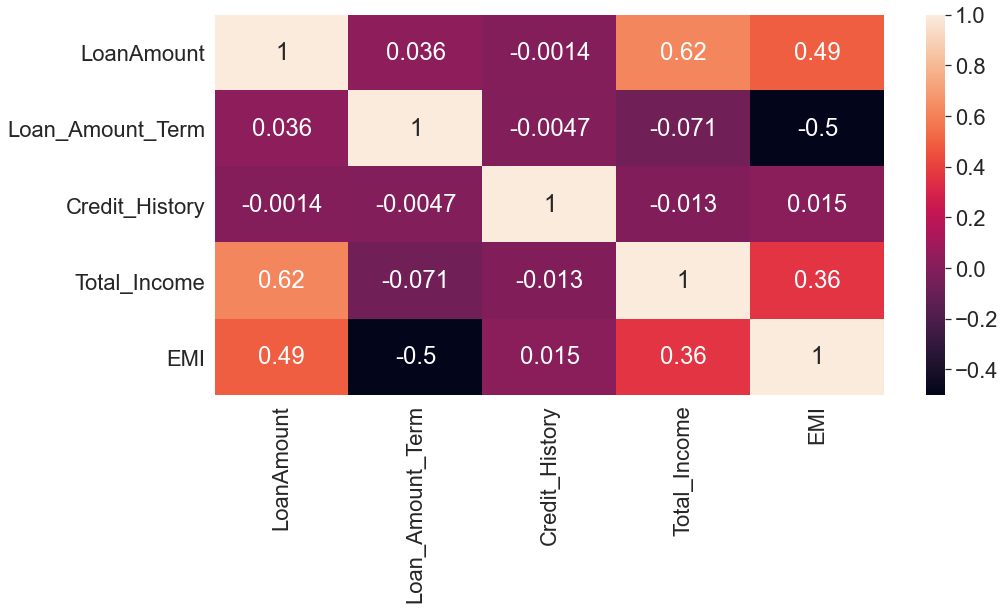

In [108]:
corr= df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

In [109]:
cols= ['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income','EMI','Loan_Status']
feature_cols=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income','EMI']
feature_names=feature_cols

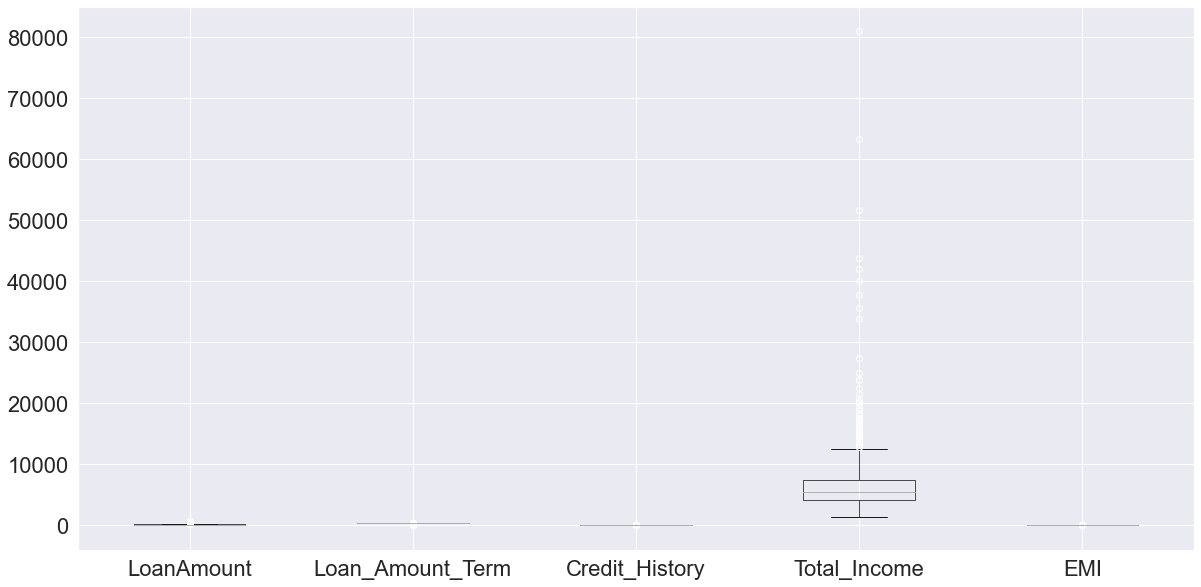

In [110]:
# Checking for Outliers
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

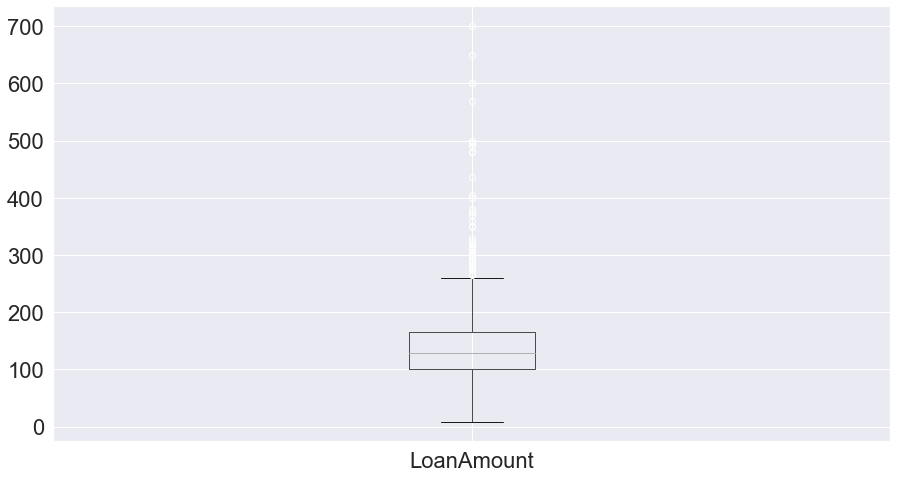

In [111]:
# Checking for One by One
plt.figure(figsize=(15,8))
df.boxplot('LoanAmount')
plt.show()

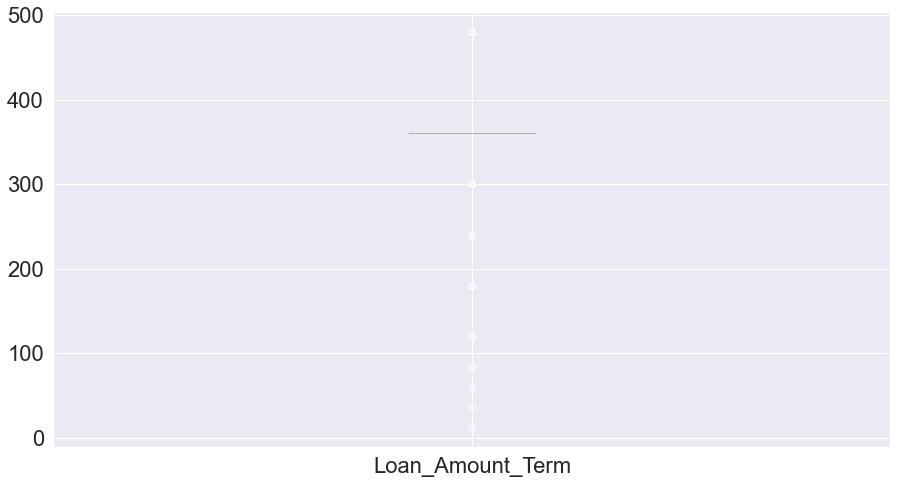

In [112]:
plt.figure(figsize=(15,8))
df.boxplot('Loan_Amount_Term')
plt.show()

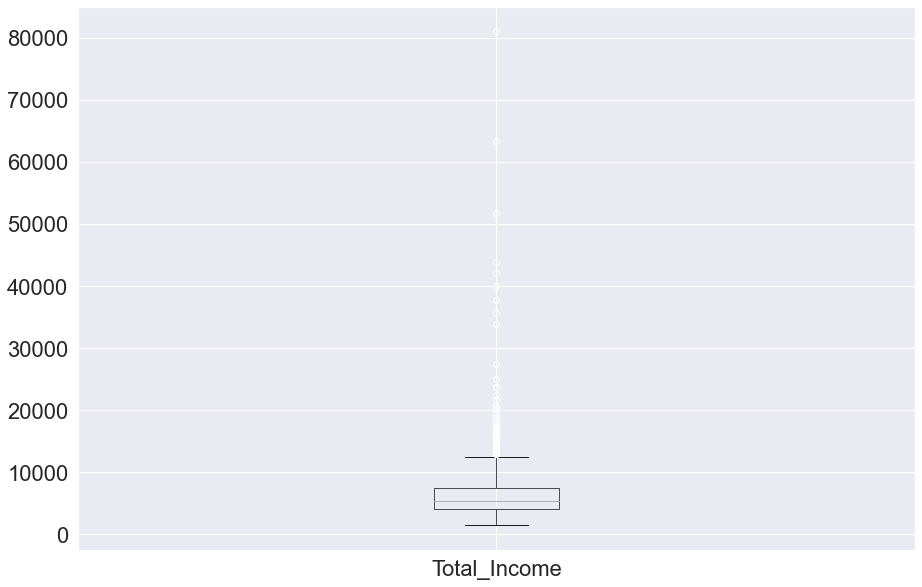

In [113]:
plt.figure(figsize=(15,10))
df.boxplot('Total_Income')
plt.show()

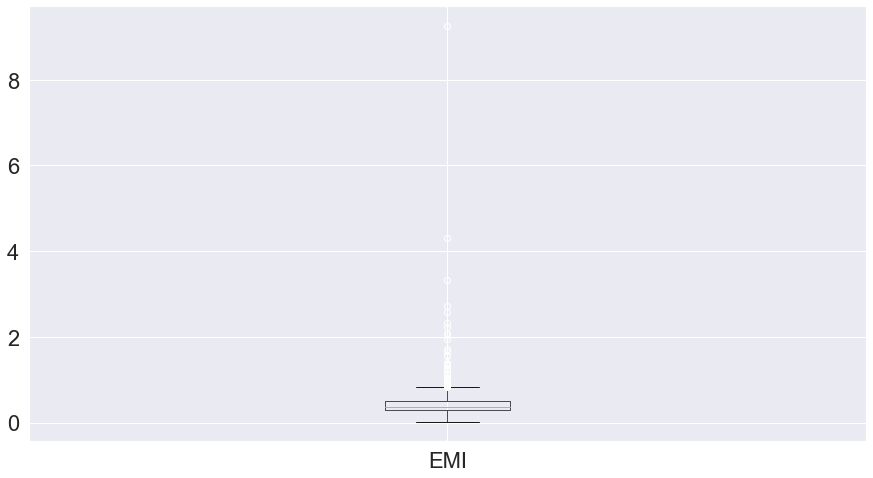

In [114]:
plt.figure(figsize=(15,8))
df.boxplot('EMI')
plt.show()

In [115]:
df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,EMI
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,146.412162,342.410423,0.855049,7024.705081,0.475728
std,84.037468,64.428629,0.352339,6458.663872,0.511056
min,9.000000,12.000000,0.000000,1442.000000,0.025000
25%,100.250000,360.000000,1.000000,4166.000000,0.288889
50%,129.000000,360.000000,1.000000,5416.500000,0.369444
75%,164.750000,360.000000,1.000000,7521.750000,0.505556
max,700.000000,480.000000,1.000000,81000.000000,9.250000


In [116]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [117]:
#df.Credit_History=df.Credit_History.map({'0.0':'No','1.0':'Yes'})
df['Credit_History'].value_counts()
df['Credit_History'].replace([0,1],['No','Yes'], inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,Male,No,0,Graduate,No,146.412162,360.0,Yes,Urban,5849.0,0.406700,Y
1,Male,Yes,1,Graduate,No,128.000000,360.0,Yes,Rural,6091.0,0.355556,N
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,Yes,Urban,3000.0,0.183333,Y
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,Yes,Urban,4941.0,0.333333,Y
4,Male,No,0,Graduate,No,141.000000,360.0,Yes,Urban,6000.0,0.391667,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,360.0,Yes,Rural,2900.0,0.197222,Y
610,Male,Yes,3+,Graduate,No,40.000000,180.0,Yes,Rural,4106.0,0.222222,Y
611,Male,Yes,1,Graduate,No,253.000000,360.0,Yes,Urban,8312.0,0.702778,Y
612,Male,Yes,2,Graduate,No,187.000000,360.0,Yes,Urban,7583.0,0.519444,Y


In [118]:
#Apply the function to your data
for column in df.columns:
  if df[column].dtype != 'object':
    UL, LL = outlier_limits(df[column])
    df[column] = np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column]) 

In [119]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
LoanAmount          41
Loan_Amount_Term    88
Credit_History       0
Property_Area        0
Total_Income        50
EMI                 50
Loan_Status          0
dtype: int64

In [120]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Total_Income'] = df['Total_Income'].fillna(df['Total_Income'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['EMI'] = df['EMI'].fillna(df['EMI'].mean())

In [121]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Total_Income        0
EMI                 0
Loan_Status         0
dtype: int64

## Feature Encoding

In [122]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
cols = ["Gender","Married","Property_Area","Education","Self_Employed", "Loan_Status", "Credit_History"]
for col in cols:
    df[col]= lb.fit_transform(df[col])

In [123]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,1,0,0,0,0,146.412162,360.0,1,2,5849.0,0.406700,1
1,1,1,1,0,0,128.000000,360.0,1,0,6091.0,0.355556,0
2,1,1,0,0,1,66.000000,360.0,1,2,3000.0,0.183333,1
3,1,1,0,1,0,120.000000,360.0,1,2,4941.0,0.333333,1
4,1,0,0,0,0,141.000000,360.0,1,2,6000.0,0.391667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1,0,2900.0,0.197222,1
610,1,1,3+,0,0,40.000000,360.0,1,0,4106.0,0.222222,1
611,1,1,1,0,0,253.000000,360.0,1,2,8312.0,0.702778,1
612,1,1,2,0,0,187.000000,360.0,1,2,7583.0,0.519444,1


In [124]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':4})
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

### Final Dataset

In [125]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI,Loan_Status
0,1,0,0,0,0,146.412162,360.0,1,2,5849.0,0.406700,1
1,1,1,1,0,0,128.000000,360.0,1,0,6091.0,0.355556,0
2,1,1,0,0,1,66.000000,360.0,1,2,3000.0,0.183333,1
3,1,1,0,1,0,120.000000,360.0,1,2,4941.0,0.333333,1
4,1,0,0,0,0,141.000000,360.0,1,2,6000.0,0.391667,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1,0,2900.0,0.197222,1
610,1,1,4,0,0,40.000000,360.0,1,0,4106.0,0.222222,1
611,1,1,1,0,0,253.000000,360.0,1,2,8312.0,0.702778,1
612,1,1,2,0,0,187.000000,360.0,1,2,7583.0,0.519444,1


# Spliting Data into Train & Test set

In [126]:
from sklearn.model_selection import train_test_split
X= df.drop('Loan_Status', axis=1)
y= df["Loan_Status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=51)



print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)


(491, 11)
(491,)
(123, 11)
(123,)


# Building Decision Tree Model

In [127]:
from sklearn.tree import DecisionTreeClassifier

dcf= DecisionTreeClassifier()
dcf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

## Train & Predict

In [128]:
# Train Decision Tree Classifer
train = dcf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dcf.predict(X_test)


[[17 19]
 [23 64]]
Accuracy score: 0.6585365853658537
Cross validation is 70.68106090896976


<AxesSubplot:>

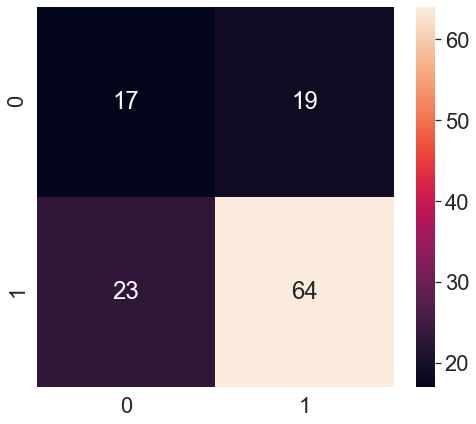

In [129]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)

accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
score = cross_val_score(dcf, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True)

In [130]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.47      0.45        36
           1       0.77      0.74      0.75        87

    accuracy                           0.66       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.67      0.66      0.66       123



## Visualization Decision Tree

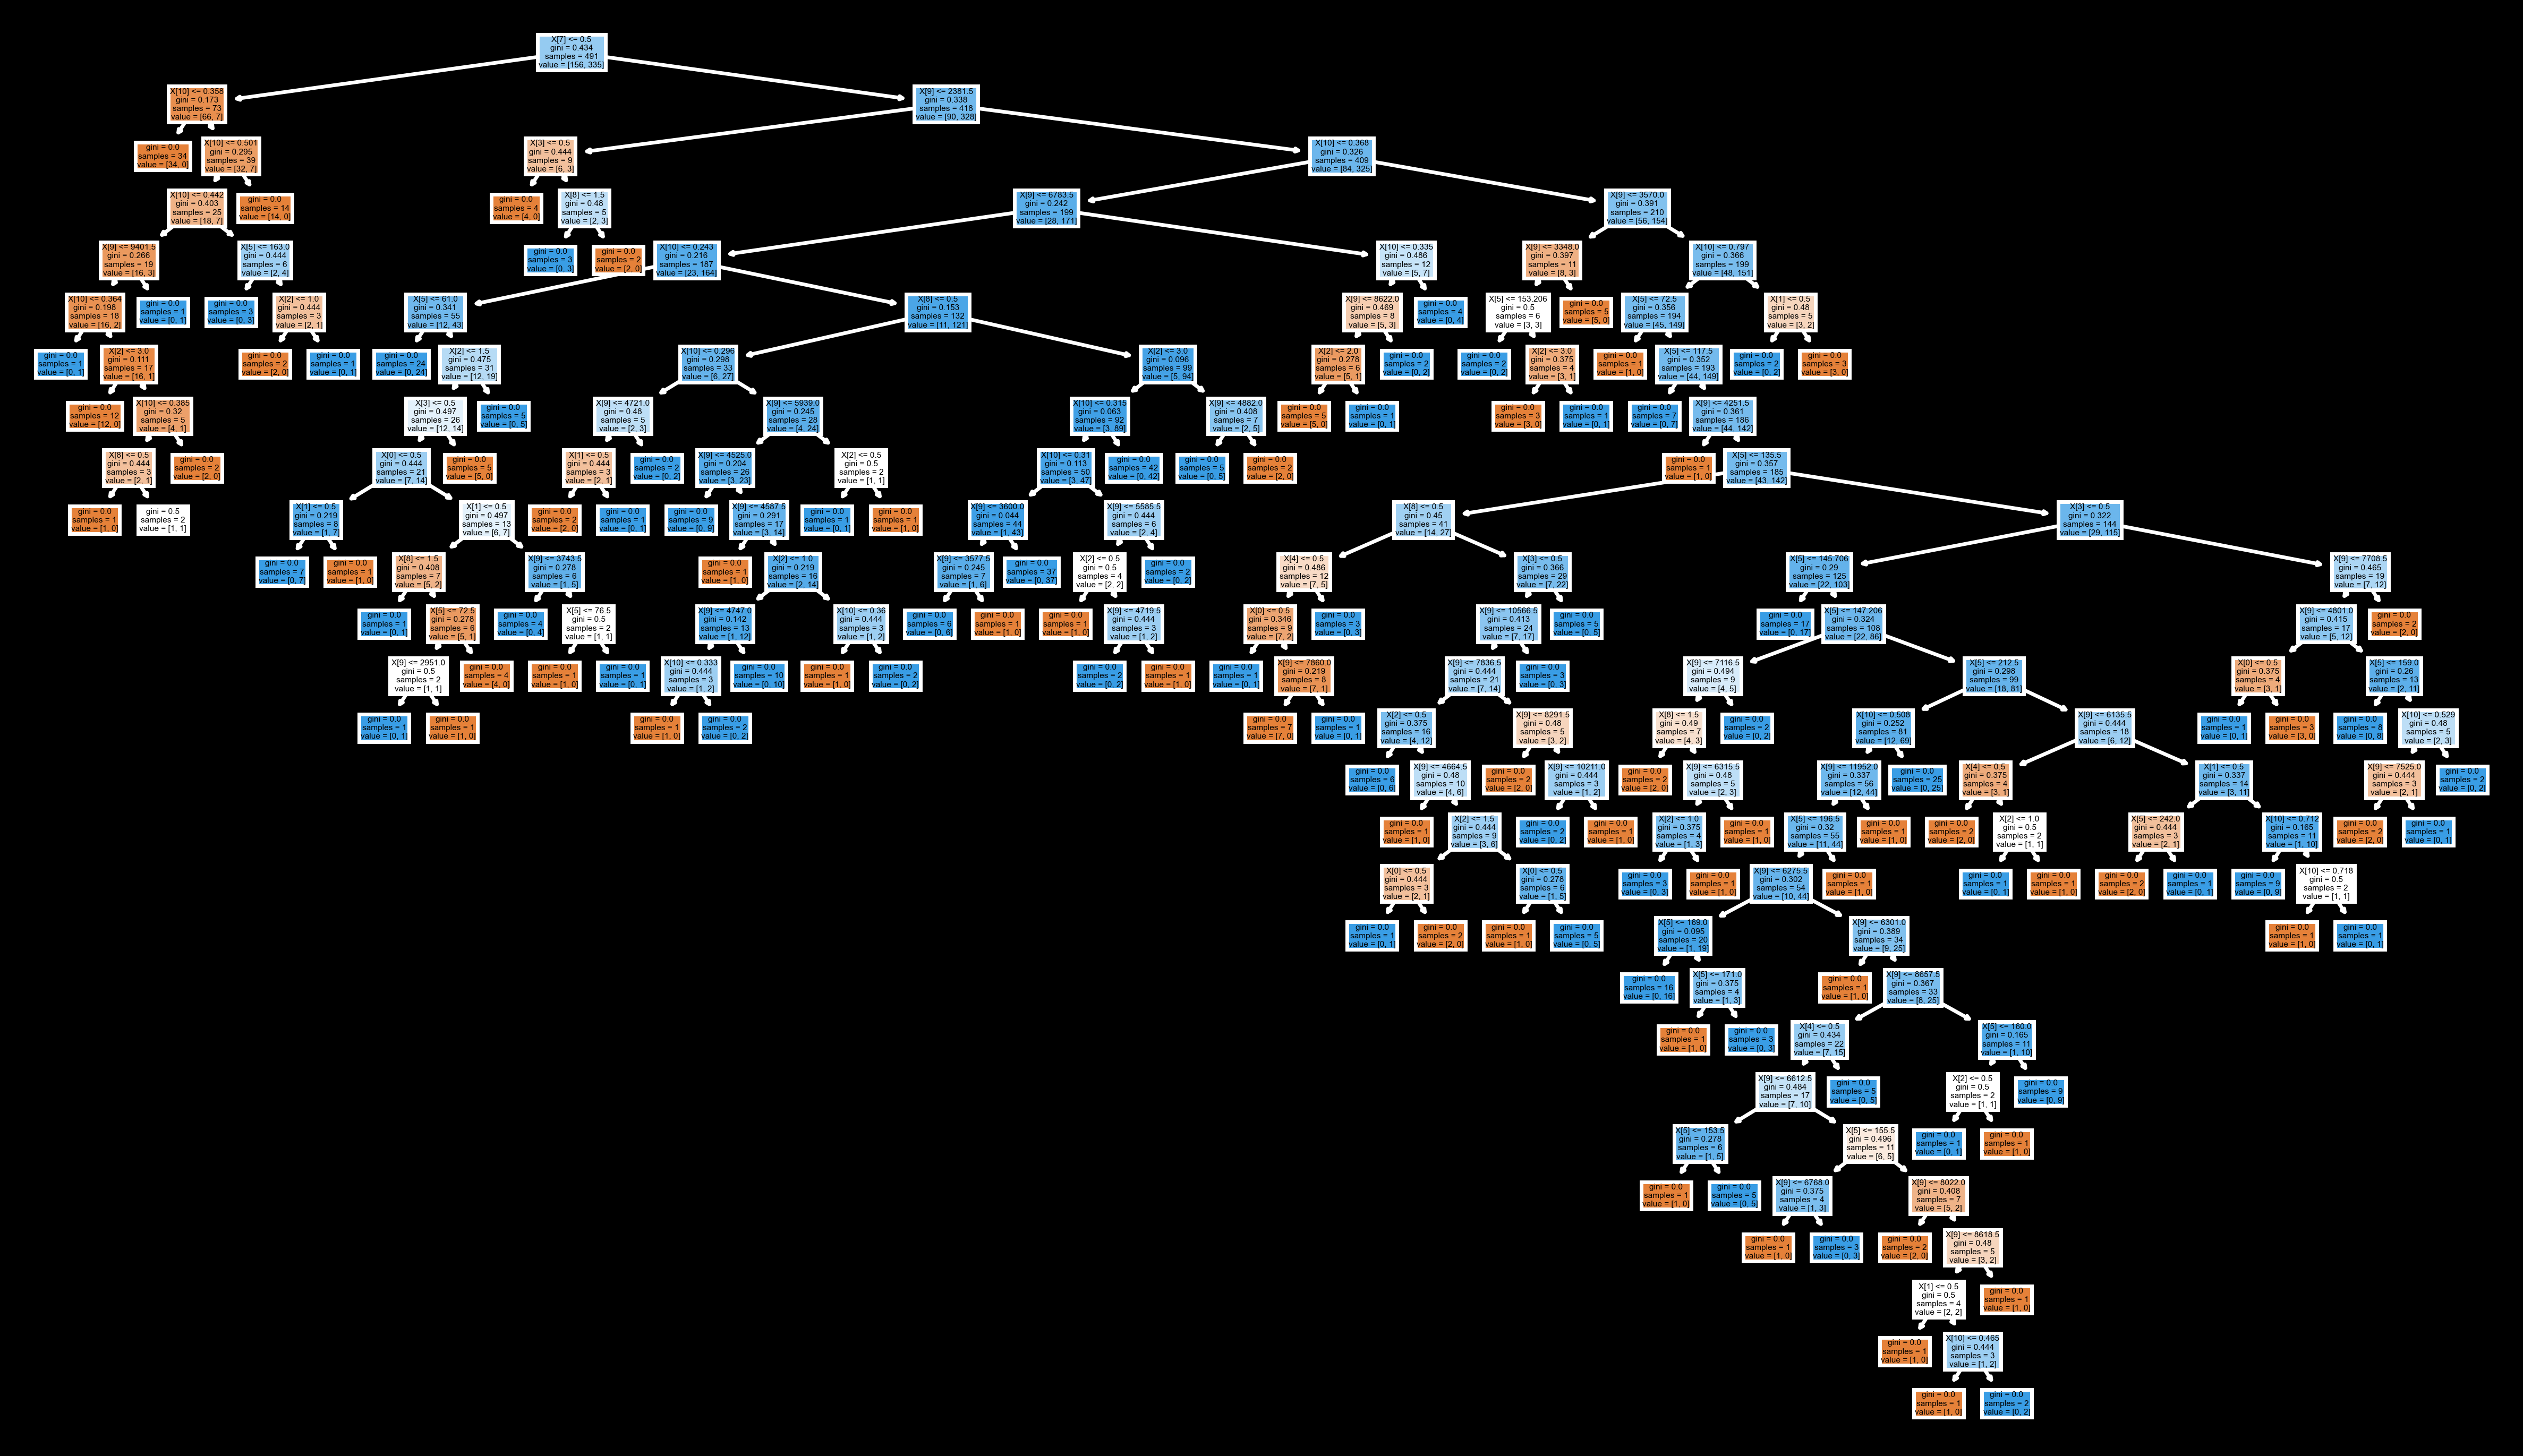

In [131]:
from sklearn import tree
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

plt.figure(figsize=(12, 7),dpi=500)
#plt.figure(figsize=(120, 70))
tree.plot_tree(dcf,filled=True);
plt.show()

## Optimization of Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

clf= tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [133]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluation of Model after optimization

[[16 20]
 [ 0 87]]
Accuracy score: 83.73983739837398
Cross validation is 80.29721444755431


<AxesSubplot:>

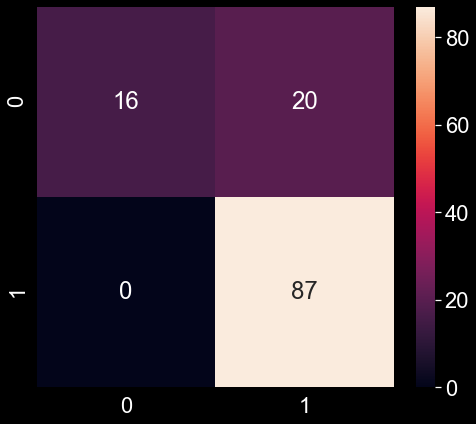

In [134]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

cm1 = metrics.confusion_matrix(y_test, y_pred) 
print(cm1)

accuracy1 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",(accuracy1*100))
score1 = cross_val_score(clf, X, y, cv=5)
print("Cross validation is",np.mean(score1)*100)

plt.figure(figsize=(8,7))
sns.heatmap(cm1, annot=True)

In [135]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        36
           1       0.81      1.00      0.90        87

    accuracy                           0.84       123
   macro avg       0.91      0.72      0.76       123
weighted avg       0.87      0.84      0.81       123



## Final Decision Tree Visualization

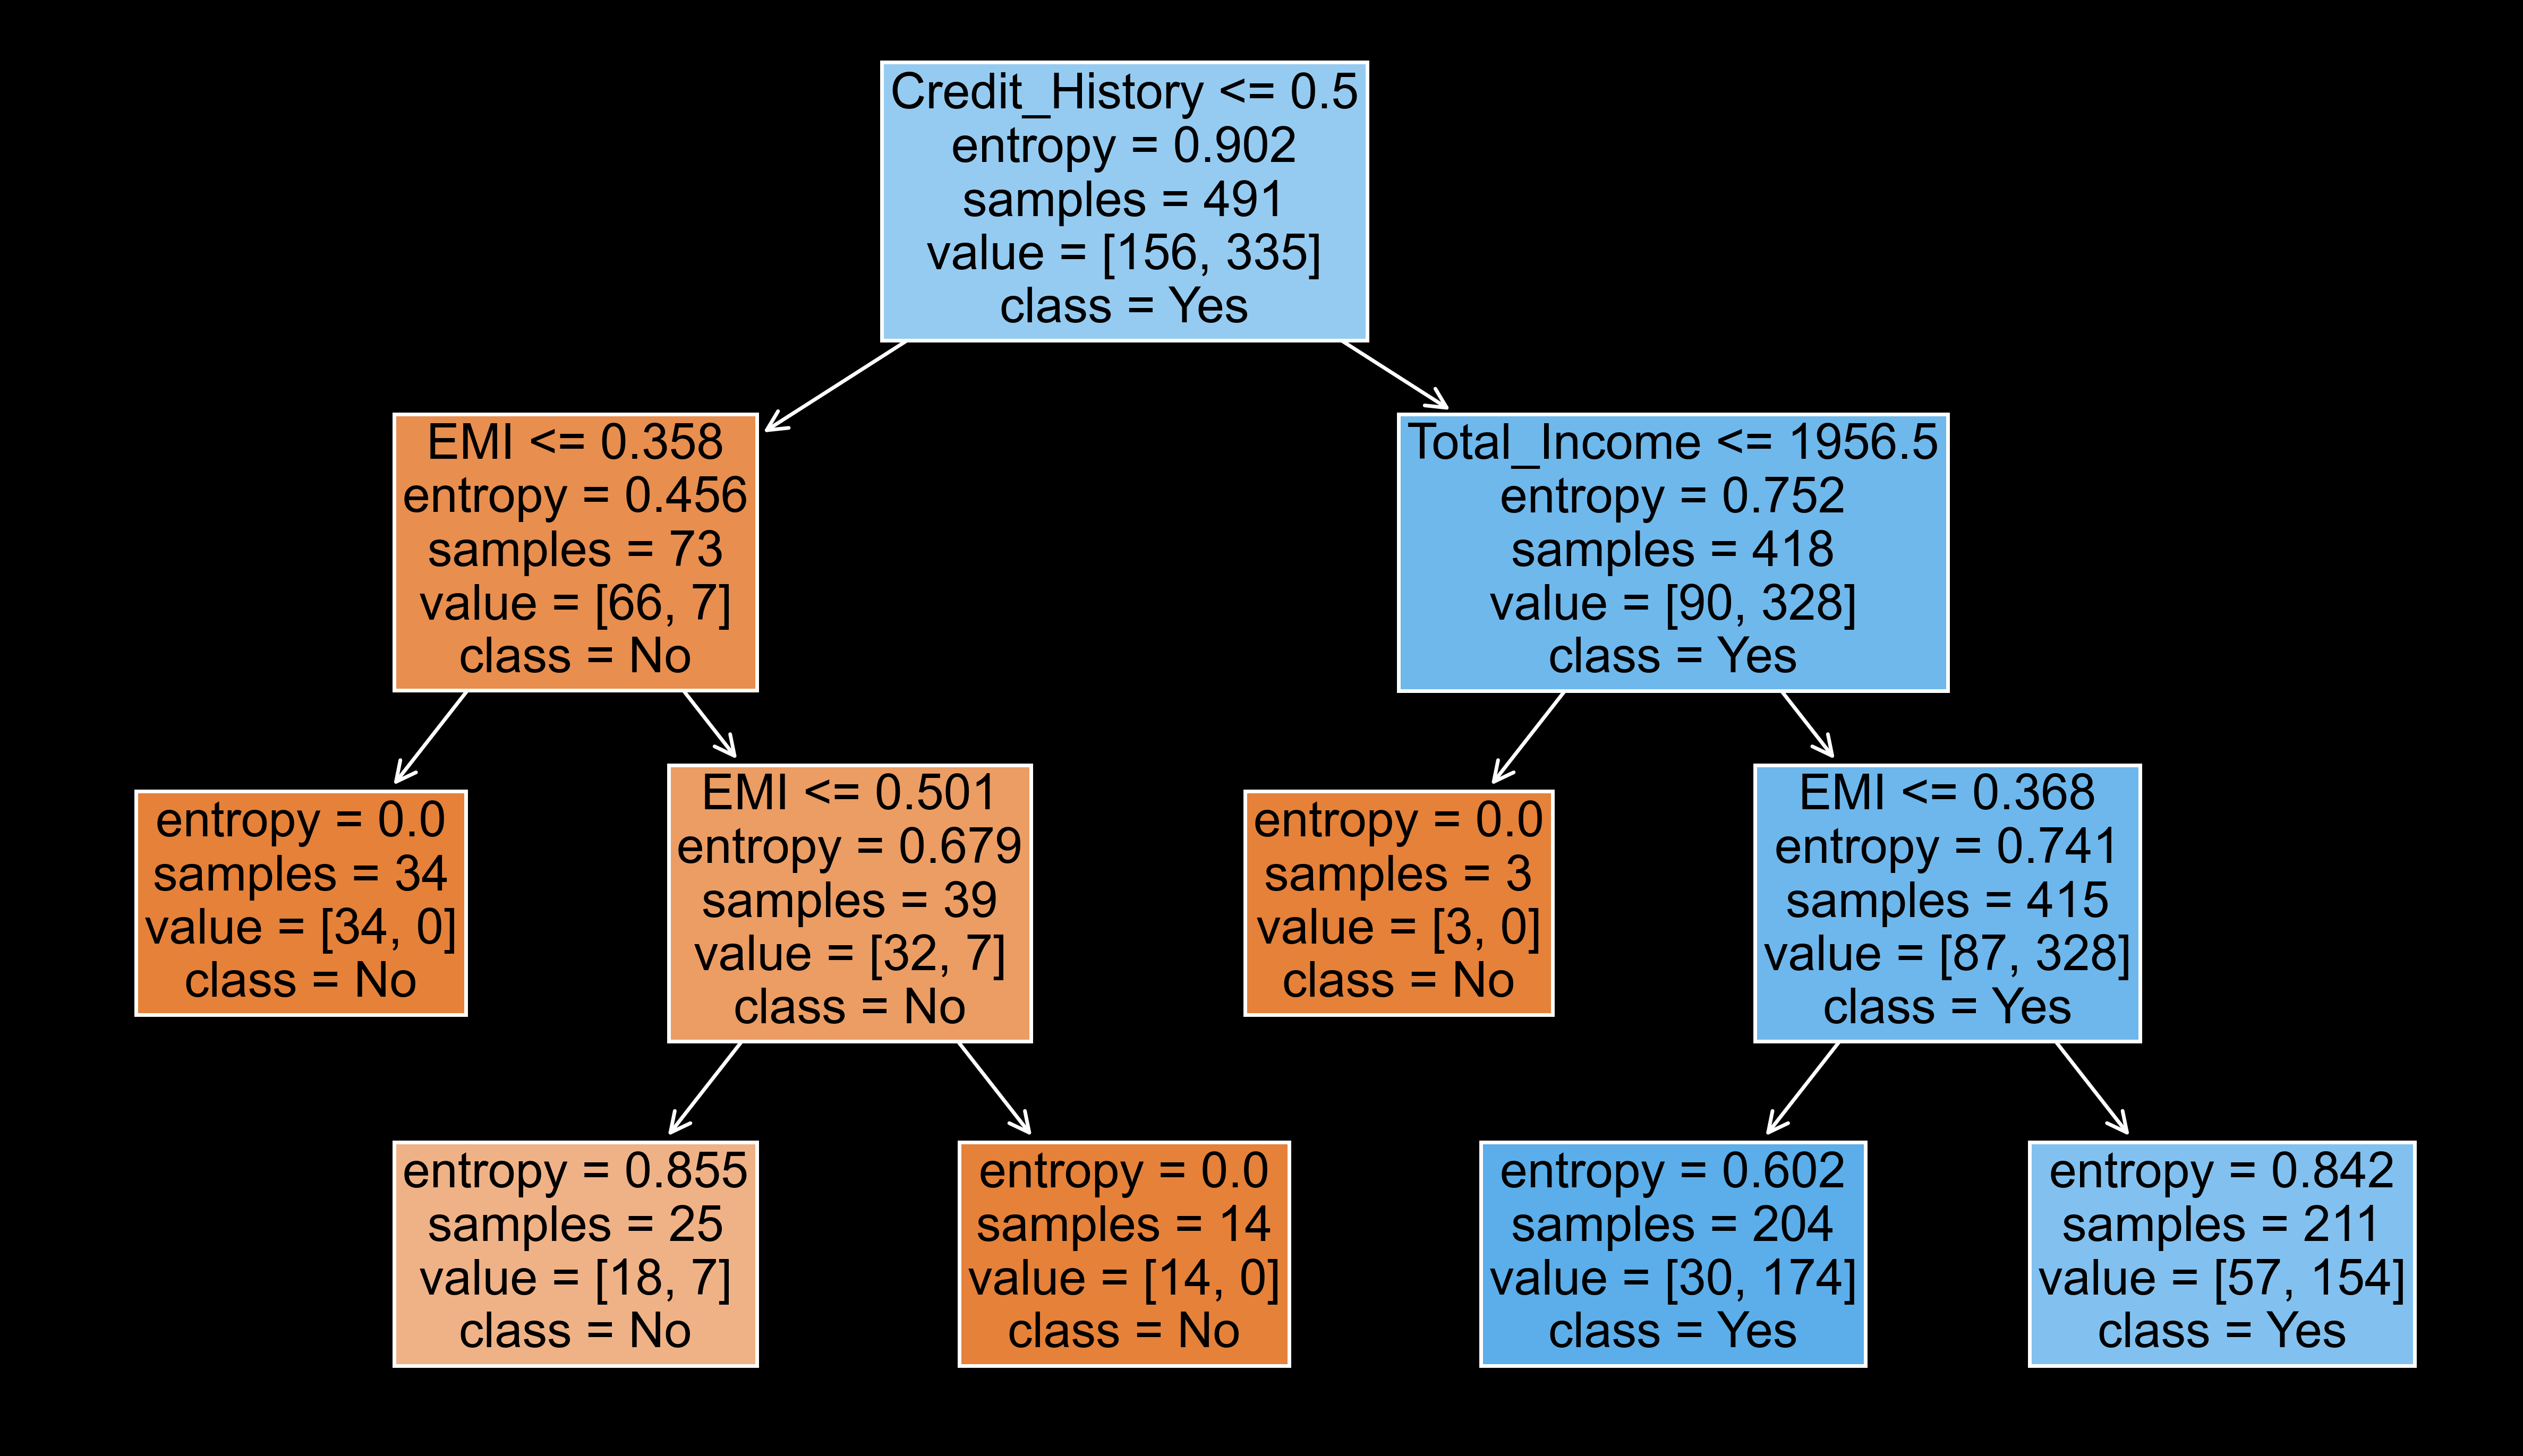

In [136]:
from sklearn import tree
import matplotlib as mpl
plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'

plt.figure(figsize=(12, 7), dpi=500)
#plt.figure(figsize=(120, 70))
out= tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["No", "Yes"],
               filled=True,
               );


plt.show(out)


In [137]:
df_importance = pd.DataFrame({'Features': X.columns,'Importance':clf.feature_importances_})
df_importance

,Features,Importance
0,Gender,0.000000
1,Married,0.000000
2,Dependents,0.000000
3,Education,0.000000
4,Self_Employed,0.000000
5,LoanAmount,0.000000
6,Loan_Amount_Term,0.000000
7,Credit_History,0.788891
8,Property_Area,0.000000
9,Total_Income,0.055427


## Random Forest Model

In [138]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [139]:
rc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [140]:
# Traing of the Model
train_rc= rc.fit(X_train,y_train)

# Prediction of Model
y_pred2 = rc.predict(X_test)

[[17 19]
 [ 3 84]]
Accuracy score: 82.11382113821138
Cross validation is 77.69292283086766
F1 Score is 0.8842105263157896
              precision    recall  f1-score   support

           0       0.85      0.47      0.61        36
           1       0.82      0.97      0.88        87

    accuracy                           0.82       123
   macro avg       0.83      0.72      0.75       123
weighted avg       0.83      0.82      0.80       123



<AxesSubplot:>

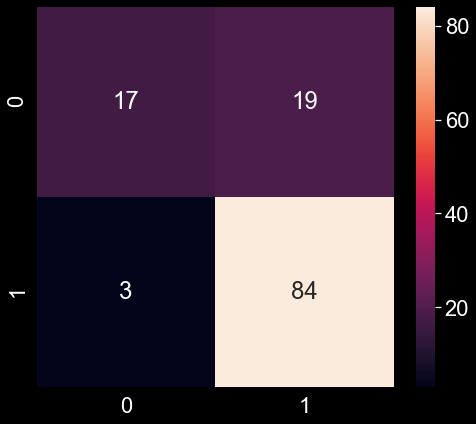

In [141]:
from sklearn.metrics import f1_score
cm2 = metrics.confusion_matrix(y_test, y_pred2) 
print(cm2)

accuracy2 = metrics.accuracy_score(y_test, y_pred2) 
print("Accuracy score:",(accuracy2*100))
score2 = cross_val_score(rc, X, y, cv=5)
print("Cross validation is",np.mean(score2)*100)
print("F1 Score is",f1_score(y_test,y_pred2))
report= cr(y_test,y_pred2)
print(report)
plt.figure(figsize=(8,7))
sns.heatmap(cm2, annot=True)

In [142]:
df_importance = pd.DataFrame({'Features': X.columns,'Importance':rc.feature_importances_})
df_importance

,Features,Importance
0,Gender,0.021699
1,Married,0.027745
2,Dependents,0.056420
3,Education,0.021442
4,Self_Employed,0.019014
5,LoanAmount,0.169758
6,Loan_Amount_Term,0.000000
7,Credit_History,0.240969
8,Property_Area,0.055304
9,Total_Income,0.211030


## Model Comparism

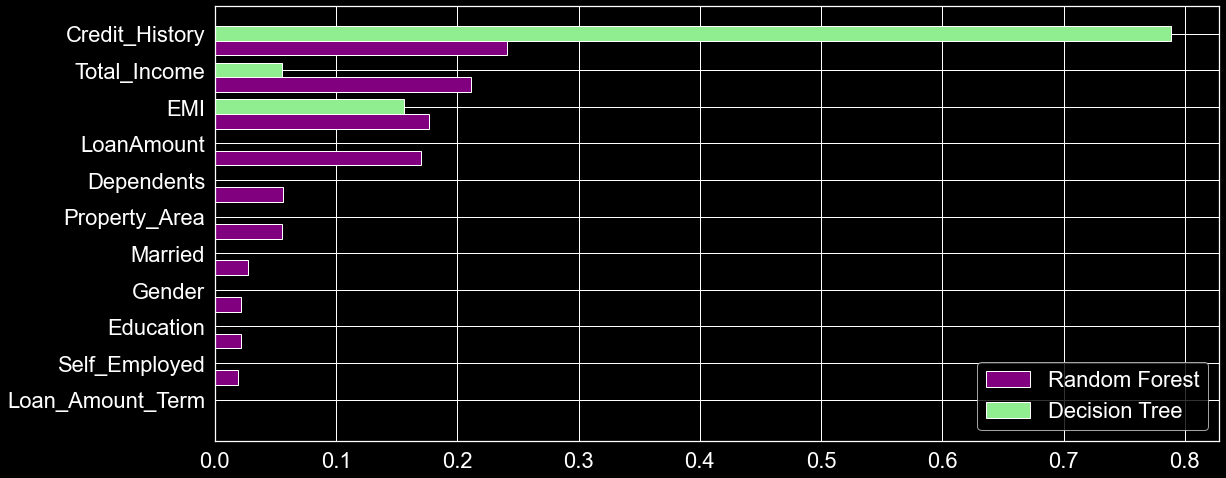

In [143]:
feature_importance=pd.DataFrame({
    'rc':rc.feature_importances_,
    'clf':clf.feature_importances_
},index=df.drop(columns=['Loan_Status']).columns)
feature_importance.sort_values(by='rc',ascending=True,inplace=True)

plt.style.use('dark_background')

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rc_feature=ax.barh(index,feature_importance['rc'],0.4,color='purple',label='Random Forest')
clf_feature=ax.barh(index+0.4,feature_importance['clf'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [ ]:
import joblib
joblib.dump(clf,"decision_tree_model.pkl")

In [ ]:
model = joblib.load("decision_tree_model.pkl")

In [ ]:
model.predict([[0,0,0,0,1,133,360,0,1,4583,0.36]])

In [ ]:
import pickle
with open('decision_tree.pickle','wb') as f:
    pickle.dump(clf,f)

In [ ]:
import pickle
with open('dm_forest.pickle','wb') as f:
    pickle.dump(rc,f)

## For unknown dataset

In [ ]:
ef=pd.read_csv('loan-test.csv')

In [ ]:
ef['LoanAmount'] = ef['LoanAmount'].fillna(ef['LoanAmount'].mean())
ef['Credit_History'] = ef['Credit_History'].fillna(ef['Credit_History'].median())
ef['Loan_Amount_Term'] = ef['Loan_Amount_Term'].fillna(ef['Loan_Amount_Term'].median())

In [ ]:
cols= ef[["Gender","Married","Dependents","Self_Employed"]]
for i in cols:
    ef[i].fillna(ef[i].mode().iloc[0], inplace=True)

In [ ]:
ef['Total_Income']= ef['ApplicantIncome']+ef['CoapplicantIncome']
ef['EMI']= ef['LoanAmount']/ef['Loan_Amount_Term']

ef= ef.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
cols = ["Gender","Married","Property_Area","Education","Self_Employed", "Credit_History"]
for col in cols:
    ef[col]= lb.fit_transform(ef[col])
    
ef.Dependents=ef.Dependents.map({'0':0,'1':1,'2':2,'3+':4})


In [ ]:
predictors= ['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income','EMI']


x_test = ef[predictors].values
predicted = rc.predict(x_test)
predicted = lb.inverse_transform(predicted)
ef['Loan_Status'] = predicted

In [ ]:
ef

### Write to .csv

In [ ]:
ef.to_csv('LoanPrediction.csv', columns=['Loan_ID','Loan_Status'])